In [31]:
import sklearn
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error
import numpy as np
from tensorflow.keras import datasets
import matplotlib.pyplot as plt

In [32]:
(x_train, y_train), (x_test, y_test) = datasets.boston_housing.load_data()

In [33]:
type(y_train)

numpy.ndarray

In [34]:
layer_sizes = (100)
alpha = 0.0001 # alpha used by L2 regularization
batch_size = 10
step_size = 0.0000001


constant_model = MLPRegressor(solver="sgd", batch_size=batch_size, learning_rate_init=step_size)
adam_model = MLPRegressor(solver="adam", batch_size=batch_size)


In [35]:
def partial_train_loop(model: sklearn.neural_network._multilayer_perceptron.MLPRegressor, n_epochs: int, train_data:np.ndarray, train_labels:np.ndarray, test_data:np.ndarray, test_labels:np.ndarray):
    errors = []
    losses = []
    for epoch in range(n_epochs):
        model.partial_fit(train_data, train_labels)
        preds = model.predict(test_data)
        errors.append(mean_absolute_error(test_labels, preds))
        losses.append(model.loss_)


    return model, errors, losses

In [36]:
mod, errs, loss = partial_train_loop(constant_model, 50, x_train, y_train, x_test, y_test)

## altering constant step size

<ipython-input-40-4fb4f7e3dad8>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2, 1, 1)
<ipython-input-40-4fb4f7e3dad8>:15: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(2, 1, 2)
<ipython-input-40-4fb4f7e3dad8>:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created an

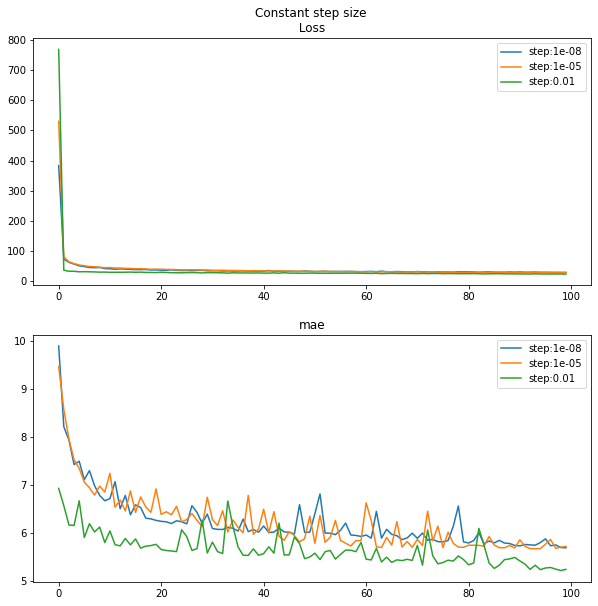

In [40]:
step_sizes = [1e-8, 1e-5, 0.01]
# passing in model causes trinaing to carry over.
# step_sizes = [1e-8, 0.1]
plt.figure(figsize=[10,10])
for step in step_sizes:
    constant_model = MLPRegressor(solver="sgd", batch_size=batch_size, learning_rate_init=step_size)

    mod, errs, loss = partial_train_loop(constant_model, 100, x_train, y_train, x_test, y_test)
    
    plt.subplot(2, 1, 1)
    plt.title("Constant step size \n Loss ")
    plt.plot(range(len(loss)), loss, label = f"step:{step}")
    plt.legend()

    plt.subplot(2, 1, 2)
    plt.plot(range(len(errs)), errs, label = f"step:{step}")
plt.title("mae")
plt.legend()
